In [2]:
import numpy as np
import phate
import scprep
import pandas as pd

In [3]:
data = np.load('../data/old/eb_hv_pca_subset.npy')

In [4]:
phate_operator = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate = phate_operator.fit_transform(data)

Calculating PHATE...
  Running PHATE on 3000 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...


    Calculated KNN search in 0.61 seconds.
    Calculating affinities...
    Calculated affinities in 0.66 seconds.
  Calculated graph and diffusion operator in 1.30 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.46 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.88 seconds.
  Calculated landmark operator in 5.32 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.29 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.58 seconds.
Calculated PHATE in 12.51 seconds.


<Axes: xlabel='PHATE 1', ylabel='PHATE 2'>

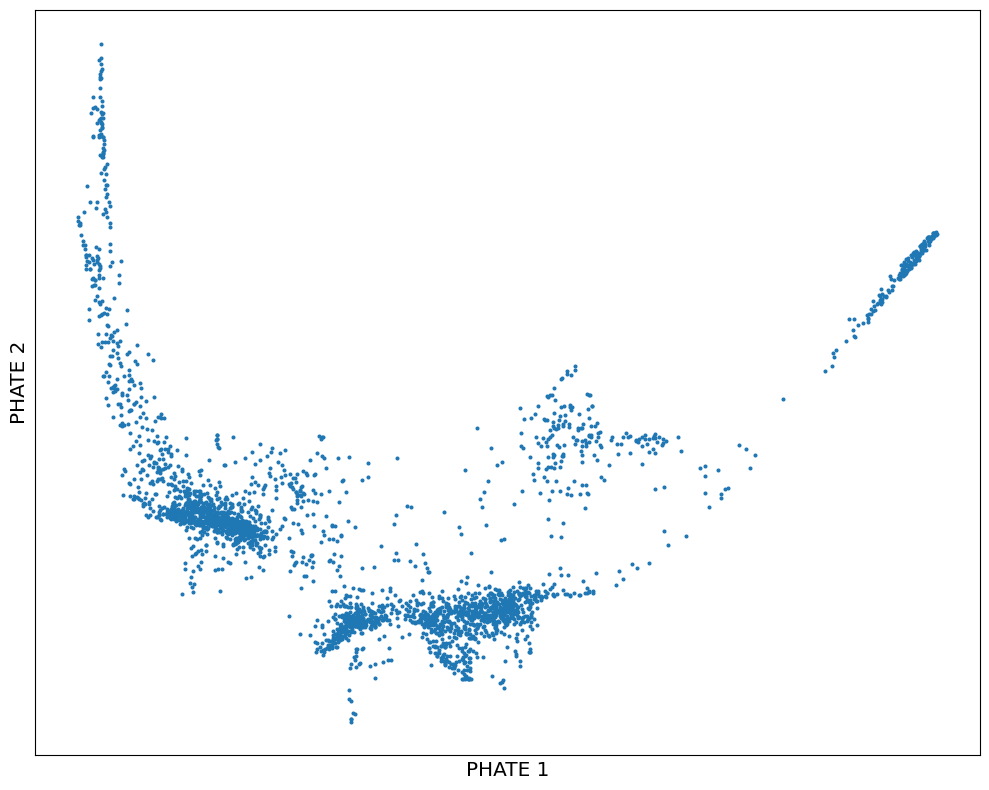

In [5]:
scprep.plot.scatter2d(Y_phate, figsize=(10,8),
                      ticks=False, label_prefix="PHATE ")

In [6]:
phate_operator.diff_op.shape

(1821, 1821)

In [7]:
phate_operator.diff_potential.shape

(3000, 1821)

In [8]:
data.shape

(3000, 50)

In [9]:
# np.save("../data/eb_hv_pca_subset_potential.npy", phate_operator.diff_potential)
# np.save("../data/eb_hv_pca_subset_phate.npy", Y_phate)

In [10]:
from scipy.spatial.distance import pdist, squareform, cdist

In [11]:
X_dist = squareform(pdist(phate_operator.diff_potential))

In [12]:
# np.save("../data/eb_hv_pca_subset_pdist.npy", X_dist)

In [13]:
X_dist2 = cdist(phate_operator.diff_potential, phate_operator.diff_potential)

In [14]:
np.equal(X_dist, X_dist2).all()

True

In [15]:
colors = pd.read_csv("../data/old/eb_hv_pca_subset_colors.csv", index_col=0)

In [16]:
colors.values

array([['Day 06-09'],
       ['Day 12-15'],
       ['Day 12-15'],
       ...,
       ['Day 00-03'],
       ['Day 00-03'],
       ['Day 18-21']], dtype=object)

In [17]:
np.savez('../data/eb_subset.npz', data=data, phate=Y_phate, dist=X_dist, colors=colors.values)